# 📊 Analyse des restaurants à Paris

Ce notebook présente une analyse exploratoire des données issues d'OpenStreetMap, concernant les restaurants référencés à Paris.

Les étapes du pipeline :
- 📥 Données issues de fichiers `.osm`
- 🧼 Nettoyage → `.csv`
- 💾 Stockage HDFS
- 🔍 Requêtes Spark SQL
- 📊 Analyse & Visualisation ici

Objectif : dégager des tendances sur les noms de restaurants les plus fréquents.

### Chargement des données

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement depuis le chemin local Windows
df = pd.read_csv(r"C:\Users\Infogene\Documents\Khoty_Privé\hadoop_datalake\hadoop-3.4.1\logs\restaurants_gold.csv")

df.head()

,restaurant_name,count
0,Speed Burger,7
1,Ninasushi,3
2,Gloria,3
3,Foc Ly,3
4,Laura,3


### Statistiques descriptives

In [6]:
df.describe()

,count
count,353.000000
mean,1.127479
std,0.480481
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,7.000000


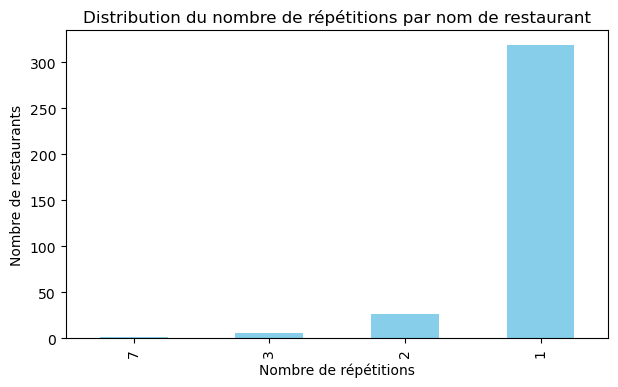

In [7]:
df["count"].value_counts().sort_index(ascending=False).plot(kind="bar", figsize=(7,4), color="skyblue")
plt.title("Distribution du nombre de répétitions par nom de restaurant")
plt.xlabel("Nombre de répétitions")
plt.ylabel("Nombre de restaurants")
plt.show()

### Top 10 des noms de restaurants les plus fréquents

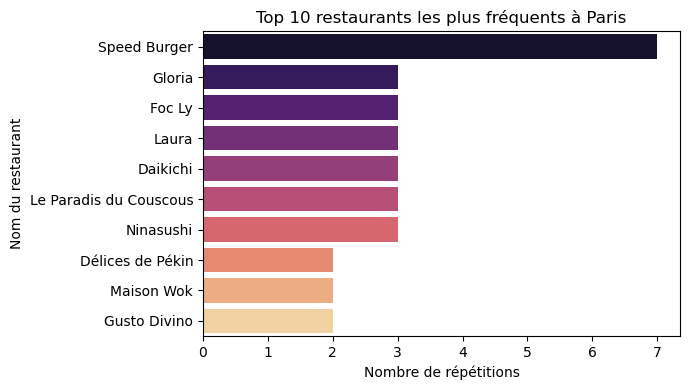

In [8]:
top_restos = df.sort_values("count", ascending=False).head(10)

plt.figure(figsize=(7,4))
sns.barplot(data=top_restos, x="count", y="restaurant_name", palette="magma")
plt.title("Top 10 restaurants les plus fréquents à Paris")
plt.xlabel("Nombre de répétitions")
plt.ylabel("Nom du restaurant")
plt.tight_layout()
plt.show()

### Analyse textuelle basique (optionnel)

In [9]:
# Fréquence des mots dans les noms
from collections import Counter

mots = " ".join(df["restaurant_name"].dropna().tolist()).split()
counter = Counter(mots)
pd.DataFrame(counter.most_common(10), columns=["Mot", "Occurrences"])

,Mot,Occurrences
0,Le,56
1,La,31
2,Sushi,14
3,Pizza,12
4,de,12
5,Chez,11
6,du,10
7,Les,10
8,Au,7
9,Neuilly,7
